Below is my version of a making regressor based on timing data, using nilearn's version of compute_regressor() and 
- save_out_usable_timing_files_budapest_v0.py
- make_regressors_monkey_kingdom_visual_localizer_localonly_vX.py

as references.

Self-notes for compute_regressors():

inputs:
- exp_condition: array-like of shape (3, n_events); yields description of events for this condition as a (onsets, durations, amplitudes) triplet

outputs:
- computed_regressors: array of shape(n_scans, n_reg); Computed regressors sampled at frame times.
- reg_names: list of strings; Corresponding regressor names.

In [1]:
import os
import numpy as np
import pandas as pd

from nilearn.glm.first_level import compute_regressor
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix


In [2]:
# Testing a single condition (face)
timing_file = os.path.expanduser('~/DP_project/_ref/sub-01_ses-01_task-loc_run-1_events.tsv')
timing_df = pd.read_csv(timing_file, sep='\t')

onset = timing_df.loc[timing_df['trial_type'] == 'face']['onset'].values
print(f'onset array: {onset}')

duration = timing_df.loc[timing_df['trial_type'] == 'face']['duration'].values
print(f'duration array: {duration}')

amplitude = np.ones((len(duration)))
print(f'amplitude array: {amplitude}')

exp_condition = ((onset, duration, amplitude))
print(f'exp_condition: \n{np.array(exp_condition)}')

n_tp = 126
t_r = 2
frame_times = np.arange(n_tp) * t_r 
print(f'frames: \n{frame_times}')

reg, names = compute_regressor(
    exp_condition=exp_condition,
    hrf_model='spm',
    frame_times=frame_times,
    con_id='face'
)
print(reg.shape)
print(names)

onset array: [ 12 132]
duration array: [12 12]
amplitude array: [1. 1.]
exp_condition: 
[[ 12. 132.]
 [ 12.  12.]
 [  1.   1.]]
frames: 
[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250]
(126, 1)
['face']


['face', 'body', 'object', 'sobject', 'scene']
regressors shape: (126, 5)
        face      body  object  sobject  scene
0   0.000000  0.000000     0.0      0.0    0.0
1   0.000000  0.000000     0.0      0.0    0.0
2   0.000000  0.000000     0.0      0.0    0.0
3   0.000000  0.000000     0.0      0.0    0.0
4   0.000000  0.000000     0.0      0.0    0.0
5   0.000000  0.000000     0.0      0.0    0.0
6   0.000000  0.000000     0.0      0.0    0.0
7   0.019587  0.000000     0.0      0.0    0.0
8   0.256813  0.000000     0.0      0.0    0.0
9   0.664321  0.000000     0.0      0.0    0.0
10  0.968704  0.000000     0.0      0.0    0.0
11  1.109914  0.000000     0.0      0.0    0.0
12  1.144716  0.000000     0.0      0.0    0.0
13  1.107831  0.000000     0.0      0.0    0.0
14  0.834953  0.000000     0.0      0.0    0.0
15  0.392603  0.000000     0.0      0.0    0.0
16  0.062430  0.000000     0.0      0.0    0.0
17 -0.094669  0.000000     0.0      0.0    0.0
18 -0.137969  0.000000     0.0   

<Axes: label='conditions', ylabel='scan number'>

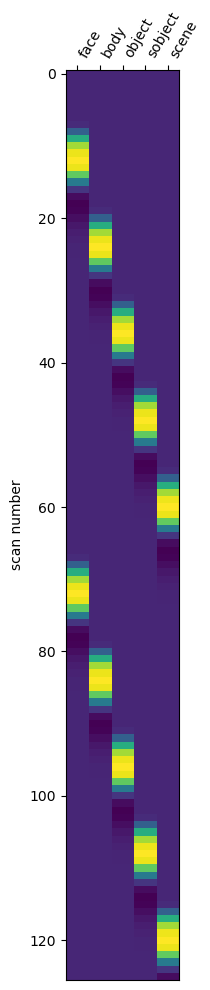

In [3]:
# Looping over all conditions

conditions = list(dict.fromkeys(timing_df['trial_type'].values)) # ordered list of unique
print(conditions)

regs = []
for cond in conditions:
    onset = timing_df.loc[timing_df['trial_type'] == cond]['onset'].values
    duration = timing_df.loc[timing_df['trial_type'] == cond]['duration'].values
    amplitude = np.ones((len(duration)))

    exp_condition = ((onset, duration, amplitude))

    reg, _ = compute_regressor(
        exp_condition=exp_condition,
        hrf_model='spm',
        frame_times=frame_times,
        con_id=cond,
        oversampling=128,
    )
    regs.append(np.ndarray.flatten(reg))

regs_data = np.array(regs).T
print(f'regressors shape: {regs_data.shape}')

regs_df = pd.DataFrame(regs_data, columns=conditions)
print(regs_df.head(n=25))

plot_design_matrix(regs_df)

        body      face  object  scene  sobject   drift_1   drift_2   drift_3  \
0   0.000000  0.000000     0.0    0.0      0.0  0.125978  0.125949  0.125900   
2   0.000000  0.000000     0.0    0.0      0.0  0.125900  0.125636  0.125196   
4   0.000000  0.000000     0.0    0.0      0.0  0.125743  0.125010  0.123792   
6   0.000000  0.000000     0.0    0.0      0.0  0.125509  0.124074  0.121695   
8   0.000000  0.000000     0.0    0.0      0.0  0.125196  0.122829  0.118918   
10  0.000000  0.000000     0.0    0.0      0.0  0.124805  0.121279  0.115476   
12  0.000000  0.000000     0.0    0.0      0.0  0.124337  0.119428  0.111388   
14  0.000000  0.019587     0.0    0.0      0.0  0.123792  0.117279  0.106677   
16  0.000000  0.256813     0.0    0.0      0.0  0.123169  0.114839  0.101370   
18  0.000000  0.664321     0.0    0.0      0.0  0.122470  0.112113  0.095495   
20  0.000000  0.968704     0.0    0.0      0.0  0.121695  0.109109  0.089087   
22  0.000000  1.109914     0.0    0.0   

<Axes: label='conditions', ylabel='scan number'>

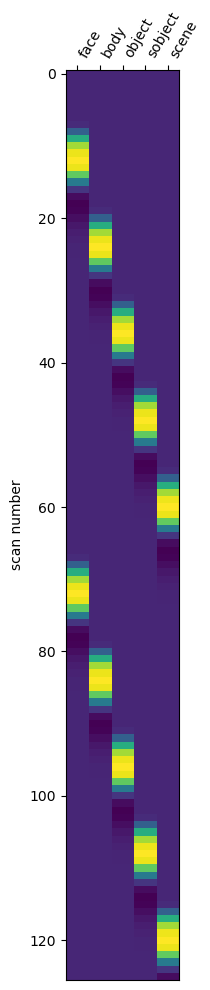

In [4]:
# Compare this to nilearn's make_first_level_design_matrix()

design_matrix = make_first_level_design_matrix(
    frame_times=frame_times,
    events=timing_df,
    hrf_model='spm',
    oversampling=128,
)

print(design_matrix.head(n=25))

plot_design_matrix(design_matrix[conditions])

In [5]:
# Check to see if outputs are the same

r = np.corrcoef(regs_df.values, design_matrix[conditions].values, rowvar=False)
cross_corr = r[:len(conditions), len(conditions):]
column_corr = np.diag(cross_corr)
print(column_corr)

[1. 1. 1. 1. 1.]


Looks like make_first_level_design_matrix() is just an easy one-liner function for compute_regressors() that only requires the timing file from fmriprep.